# Experiment 1 - Hello World

### Description
* **Dataset** : CloPeMa CTU 'Flat and Wrinkled' and 'Folded' combined. Validation subset randomly chosen with a probabilty of 30%.
(https://drive.google.com/file/d/0B8Z1YBnBij8sYmpZanJ2a2VaSGs/view?usp=sharing)
* **

In [1]:
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import operator
import pandas as pd


Using TensorFlow backend.


In [2]:
DATASET_PATH = '/home/danfergo/SIG/Code/Experiments/data/clopema'

In [3]:
train_datagen = ImageDataGenerator(
)

validation_datagen = ImageDataGenerator(
)


train_generator = train_datagen.flow_from_directory(
        DATASET_PATH + '/train',  # this is the target directory
        target_size=(150, 150),  # all images will be resized to 150x150
        batch_size=32,
        class_mode='categorical',
        shuffle=True
)

validation_generator = validation_datagen.flow_from_directory(
        DATASET_PATH + '/validation',
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical'
)

Found 2366 images belonging to 9 classes.
Found 262 images belonging to 9 classes.


In [4]:
model = Sequential()

model.add(Convolution2D(32, 3, 3, input_shape=(150, 150, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(9))
model.add(Activation('sigmoid'))

### Training

In [5]:
model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])

In [6]:
history = model.fit_generator(
        train_generator,
        samples_per_epoch=2368,
        nb_epoch=30,
        validation_data=validation_generator,
        nb_val_samples=768,
        verbose=2)

Epoch 1/30


/usr/local/lib/python3.5/dist-packages/keras/engine/training.py:1573: UserWarning: Epoch comprised more than `samples_per_epoch` samples, which might affect learning results. Set `samples_per_epoch` correctly to avoid this warning.
  warnings.warn('Epoch comprised more than '


12s - loss: 2.9783 - acc: 0.2168 - val_loss: 2.5634 - val_acc: 0.1859
Epoch 2/30
11s - loss: 1.7809 - acc: 0.4174 - val_loss: 0.8873 - val_acc: 0.8000
Epoch 3/30
11s - loss: 1.1460 - acc: 0.6485 - val_loss: 0.5144 - val_acc: 0.8513
Epoch 4/30
10s - loss: 0.8423 - acc: 0.7323 - val_loss: 0.4154 - val_acc: 0.8731
Epoch 5/30
10s - loss: 0.6447 - acc: 0.8123 - val_loss: 0.2585 - val_acc: 0.8974
Epoch 6/30
11s - loss: 0.5451 - acc: 0.8499 - val_loss: 0.2215 - val_acc: 0.9167
Epoch 7/30
11s - loss: 0.4297 - acc: 0.8862 - val_loss: 0.1375 - val_acc: 0.9577
Epoch 8/30
10s - loss: 0.3219 - acc: 0.9095 - val_loss: 0.0852 - val_acc: 0.9733
Epoch 9/30
10s - loss: 0.3004 - acc: 0.9162 - val_loss: 0.0865 - val_acc: 0.9695
Epoch 10/30
10s - loss: 0.2425 - acc: 0.9329 - val_loss: 0.0755 - val_acc: 0.9822
Epoch 11/30
10s - loss: 0.2322 - acc: 0.9399 - val_loss: 0.0445 - val_acc: 0.9873
Epoch 12/30
10s - loss: 0.2061 - acc: 0.9454 - val_loss: 0.0391 - val_acc: 0.9873
Epoch 13/30
10s - loss: 0.1903 - acc

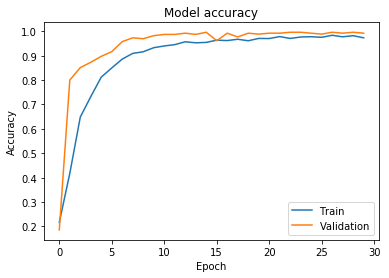

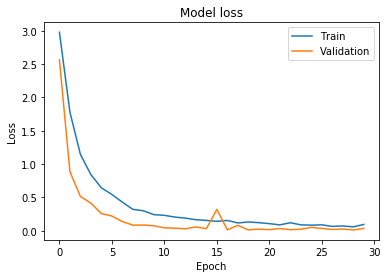

In [7]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


### Evaluation

In [21]:
test_datagen = ImageDataGenerator(
    # rescale=1./255
)

test_generator = test_datagen.flow_from_directory(
        DATASET_PATH + '/validation',
        target_size=(150, 150),
        batch_size=256,
        class_mode='categorical'
)

Found 262 images belonging to 9 classes.


In [22]:
x_test, y_test = test_generator.next()

y_pred = model.predict_classes(x_test, batch_size=256)

256/256 [==============================] - 0s


In [23]:
class_indices = validation_generator.class_indices
sorted_class_indices = sorted(class_indices.items(), key=operator.itemgetter(1))
target_names = [x[0] for x in sorted_class_indices]

labels = range(0, len(target_names))
conf = confusion_matrix(np.argmax(y_test, axis=1), y_pred, labels)
pd.DataFrame(data = conf, index=target_names, columns=target_names)


,bluse,hoody,pants,polo,polo-long,skirt,towel,tshirt,tshirt-long
bluse,9,0,0,0,0,0,0,0,0
hoody,0,4,0,0,0,0,0,0,0
pants,0,0,121,0,0,0,0,0,0
polo,0,0,0,27,0,0,0,0,0
polo-long,0,0,0,0,15,0,0,0,0
skirt,0,0,0,0,0,6,0,0,0
towel,0,0,0,0,0,0,9,0,0
tshirt,0,0,0,0,0,0,0,36,0
tshirt-long,0,0,2,0,0,0,0,0,27


### Results

This experiment allowed to test the working pipeline – Keras over Tensorflow with CUDA support; the auxiliar libraries – NumPy, Sklearn and Matplotlib; the development tool – Jupyter Notebook.

Because the used dataset was collected under artificial conditions, namely constant ilumination and background, the obtained results are extremely positive.
